In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pykep as pk

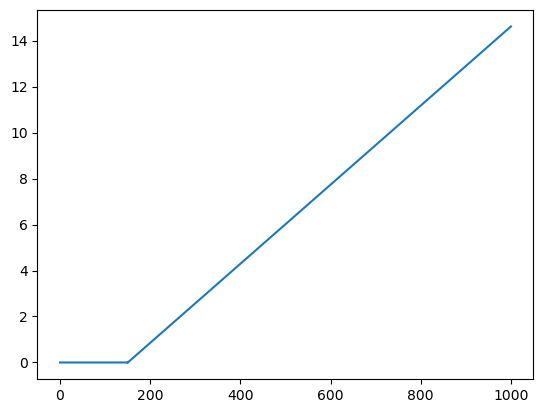

In [21]:
sc = pk.sims_flanagan.spacecraft(1000, 0.3, 2500) # spacecraft
p0 = pk.planet.jpl_lp("earth")
pf = pk.planet.jpl_lp("mars")
t0 = pk.epoch(0)
tf = pk.epoch(1000)
r0, v0 = p0.eph(t0)
rf, vf = pf.eph(tf)
x0 = pk.sims_flanagan.sc_state(r0, v0, sc.mass)
xf = pk.sims_flanagan.sc_state(rf, vf, sc.mass/10)
l0 = np.random.randn(7)
l = pk.pontryagin.leg(t0, x0, l0, tf, xf)
traj = l.get_states(atol=1e-12, rtol=1e-12)
t = traj[:, 0] # times
r = traj[:, 1:4] # positions
v = traj[:, 4:7] # velocities
m = traj[:, 7] # masses
lm = traj[:, 14] # mass costates
u = traj[:, 15] # control throttles
H = traj[:, 19] # Hamiltonians
plt.plot(t, u) # plot the control throttle history
plt.show()